In [1]:
import os

data_dir = '/kaggle/input/plantvillage/dataset'

os.listdir(data_dir)

['validation', 'test', 'train']

In [2]:
train_path = os.path.join(data_dir, 'train')
test_path = os.path.join(data_dir, 'test')
val_path = os.path.join(data_dir, 'validation')

In [3]:
folders = ['train', 'test', 'validation']

subfolder_lengths = {folder : {} for folder in folders}
#print(subfolder_lengths)

for folder in folders:
    subfolders = os.listdir(os.path.join(data_dir, folder))
    #print(subfolders)
    
    for subfolder in subfolders:
        subfolder_len  = len(os.listdir(os.path.join(data_dir, folder, subfolder)))
        subfolder_lengths[folder][subfolder] = subfolder_len
        
    print(subfolder_lengths)

{'train': {'Pepper__bell___Bacterial_spot': 797, 'Potato___healthy': 121, 'Tomato_Leaf_Mold': 761, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 2566, 'Tomato_Bacterial_spot': 1701, 'Tomato_Septoria_leaf_spot': 1416, 'Tomato_healthy': 1272, 'Tomato_Spider_mites_Two_spotted_spider_mite': 1340, 'Tomato_Early_blight': 800, 'Tomato__Target_Spot': 1123, 'Pepper__bell___healthy': 1182, 'Potato___Late_blight': 800, 'Tomato_Late_blight': 1527, 'Potato___Early_blight': 800, 'Tomato__Tomato_mosaic_virus': 298}, 'test': {}, 'validation': {}}
{'train': {'Pepper__bell___Bacterial_spot': 797, 'Potato___healthy': 121, 'Tomato_Leaf_Mold': 761, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 2566, 'Tomato_Bacterial_spot': 1701, 'Tomato_Septoria_leaf_spot': 1416, 'Tomato_healthy': 1272, 'Tomato_Spider_mites_Two_spotted_spider_mite': 1340, 'Tomato_Early_blight': 800, 'Tomato__Target_Spot': 1123, 'Pepper__bell___healthy': 1182, 'Potato___Late_blight': 800, 'Tomato_Late_blight': 1527, 'Potato___Early_blight': 800, 'To

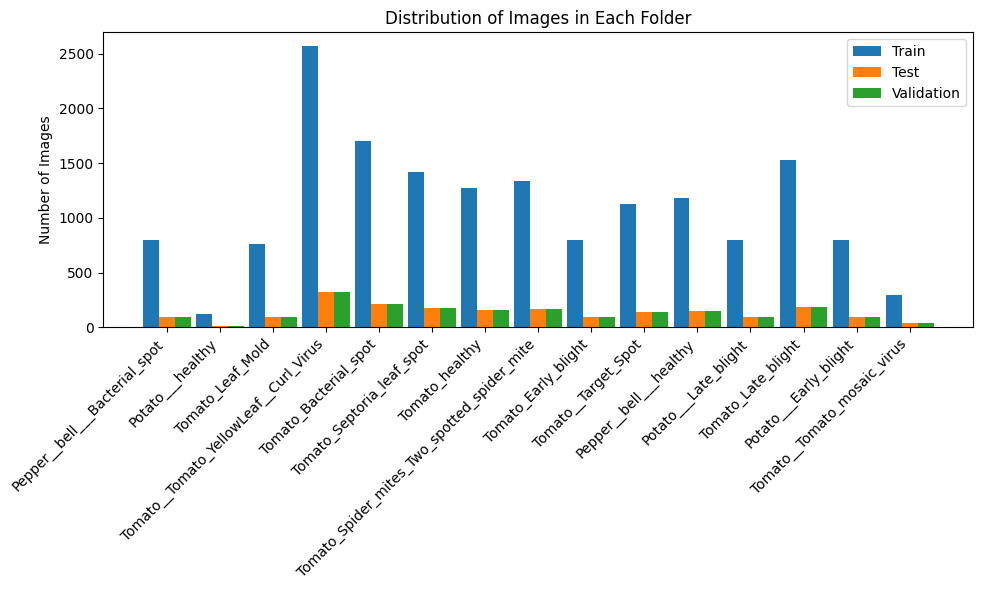

In [4]:
import numpy as np
import matplotlib.pyplot as plt

subfolder_names = list(subfolder_lengths['train'].keys())
train_lengths = list(subfolder_lengths['train'].values())
test_lengths = list(subfolder_lengths['test'].values())
val_lengths = list(subfolder_lengths['validation'].values())

x = np.arange(len(subfolder_names))
width = 0.3 

fig, ax = plt.subplots(figsize = (10,6))

rects1 = ax.bar(x - width, train_lengths, width, label = 'Train')
rects2 = ax.bar(x, test_lengths, width, label = 'Test')
rects3 = ax.bar(x + width, val_lengths, width, label = 'Validation')

ax.set_title("Distribution of Images in Each Folder")
ax.set_ylabel("Number of Images")
ax.set_xticks(x)
ax.set_xticklabels(subfolder_names, rotation = 45, ha = 'right' )
ax.legend()
plt.tight_layout()
plt.show()


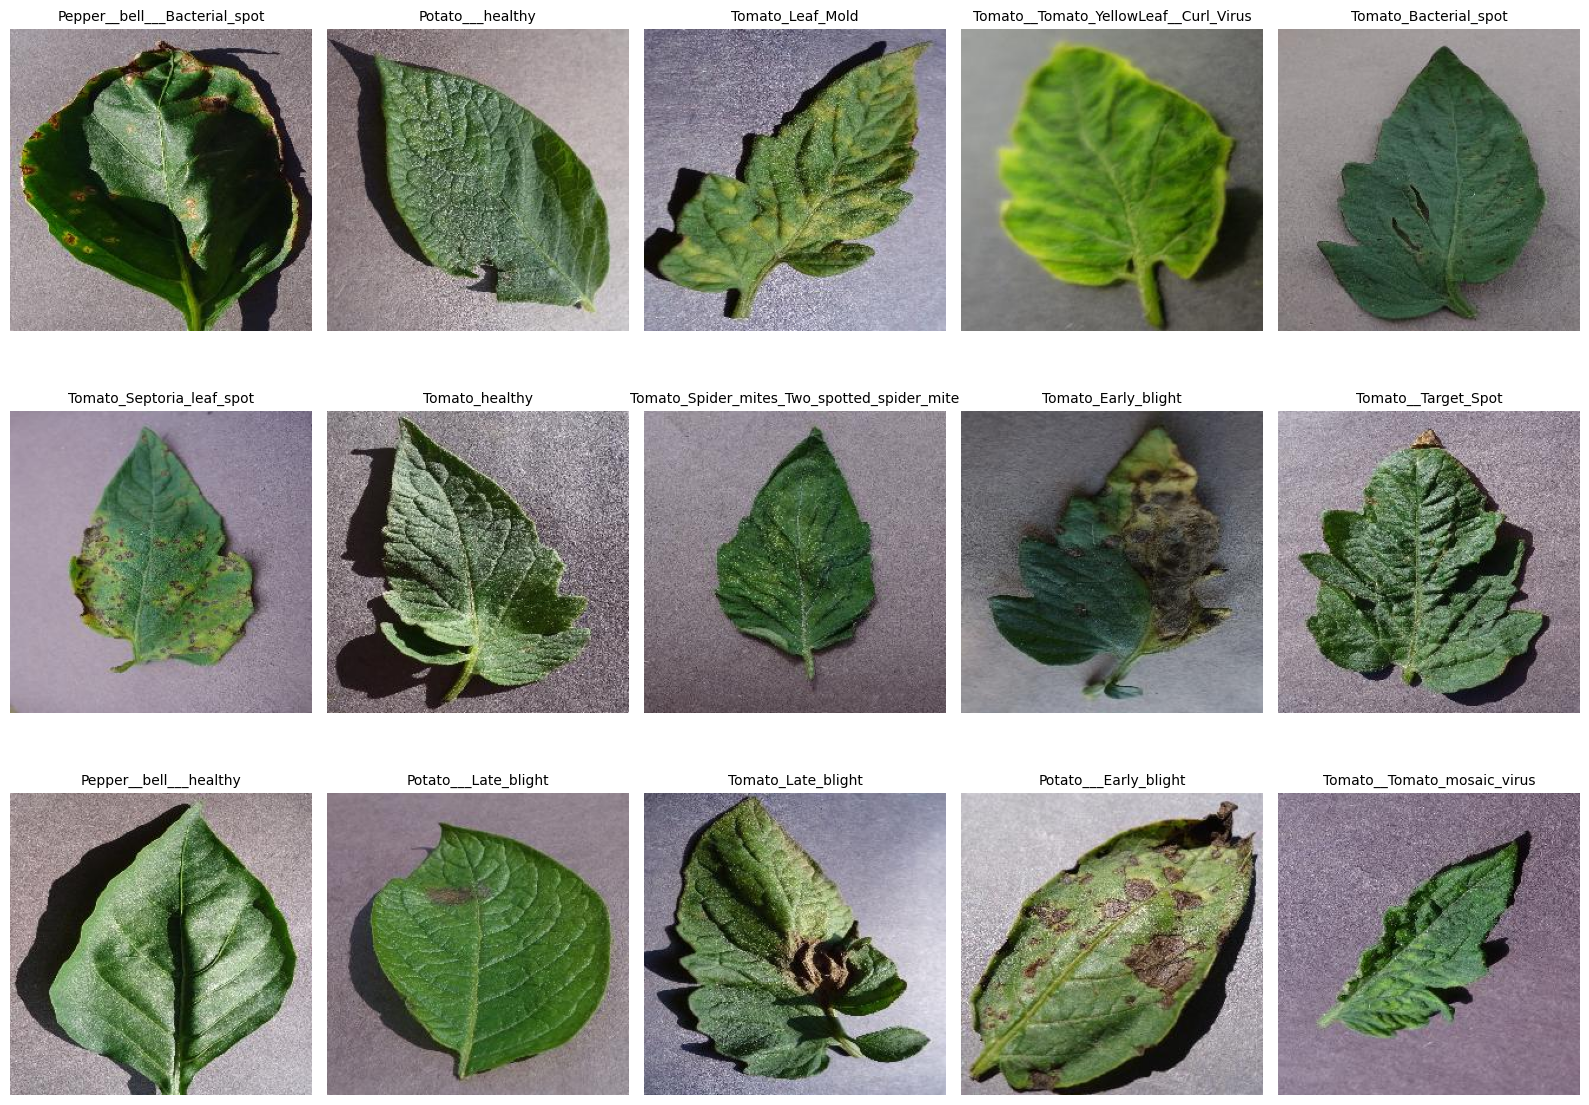

In [5]:
import matplotlib.image as mpimg

#create a grid to display the images
num_cols = 5 # no of columns in the grid
num_rows = 3 # no of rows in the grid

#Create a matplotlib figure and axis
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16,12))
axes = axes.ravel()

#loop through the subfolders and display the image from each
for i, subfolder in enumerate(subfolders):
    img = [image for image in os.listdir(os.path.join(train_path, subfolder))][0]
    
    img_path = os.path.join(train_path, subfolder, img)
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(subfolder, color = 'black', fontsize =10)
    
plt.tight_layout()
plt.show()



In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
batch_size = 32
image_shape = (256,256)

train_datagen = ImageDataGenerator(
rescale = 1/255,
shear_range = 0.2,
horizontal_flip = True,
vertical_flip = True,
brightness_range = [0.5, 1.5],
rotation_range = 40,
zoom_range = 0.2 )


train_generator = train_datagen.flow_from_directory(
train_path,
target_size = image_shape,
batch_size = batch_size,
class_mode = 'categorical'
)



Found 16504 images belonging to 15 classes.


In [8]:
val_datagen = ImageDataGenerator(
rescale = 1/255
 )


val_generator = val_datagen.flow_from_directory(
val_path,
target_size = image_shape,
batch_size = batch_size,
class_mode = 'categorical'
)


Found 2070 images belonging to 15 classes.


In [9]:
test_datagen = ImageDataGenerator(
rescale = 1/255
 )


test_generator = test_datagen.flow_from_directory(
test_path,
target_size = image_shape,
batch_size = batch_size,
class_mode = 'categorical'
)

Found 2064 images belonging to 15 classes.


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

tf.random.set_seed(42)

model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))

model.add(Dense(15, activation = 'softmax'))

#compile the model

model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'categorical_crossentropy', metrics = ['accuracy'])

checkpoint_callback = ModelCheckpoint("best_epoch_weights.h5", monitor = 'val_accuracy', save_best_only = True, mode = 'max', verbose = 1)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

In [11]:
#Train the model
tf.random.set_seed(42)

steps_per_epoch = train_generator.n // batch_size
validation_steps = val_generator.n // batch_size
epochs = 20

history = model.fit(
train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = val_generator,
validation_steps = validation_steps,
callbacks = [checkpoint_callback]
)

#find the model with the best accuracy on the validation set
best_epoch = np.argmax(history.history['val_accuracy']) + 1

print(f"Best epoch is ==> epoch {best_epoch}")

Epoch 1/20
515/515 [==============================] - ETA: 0s - loss: 1.6579 - accuracy: 0.4767
Epoch 1: val_accuracy improved from -inf to 0.52490, saving model to best_epoch_weights.h5
515/515 [==============================] - 325s 610ms/step - loss: 1.6579 - accuracy: 0.4767 - val_loss: 1.6024 - val_accuracy: 0.5249
Epoch 2/20
515/515 [==============================] - ETA: 0s - loss: 1.2495 - accuracy: 0.5939
Epoch 2: val_accuracy improved from 0.52490 to 0.57520, saving model to best_epoch_weights.h5
515/515 [==============================] - 276s 536ms/step - loss: 1.2495 - accuracy: 0.5939 - val_loss: 1.4888 - val_accuracy: 0.5752
Epoch 3/20
515/515 [==============================] - ETA: 0s - loss: 1.1481 - accuracy: 0.6295
Epoch 3: val_accuracy improved from 0.57520 to 0.63574, saving model to best_epoch_weights.h5
515/515 [==============================] - 272s 528ms/step - loss: 1.1481 - accuracy: 0.6295 - val_loss: 1.2095 - val_accuracy: 0.6357
Epoch 4/20
515/515 [========

In [12]:
#load weights of the best model
best_model = model

#compile the best model
best_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

best_model.load_weights("/kaggle/working/best_epoch_weights.h5")

best_model.save("plantleaf_disease_model.h5")

print("Model Saved")

Model Saved


In [13]:
evaluation = best_model.evaluate(test_generator, verbose = 0)
print(f"Test Accuracy = {round(evaluation[1],2)}")
print(f"Test Loss = {round(evaluation[0],3)}")


Test Accuracy = 0.74
Test Loss = 0.782


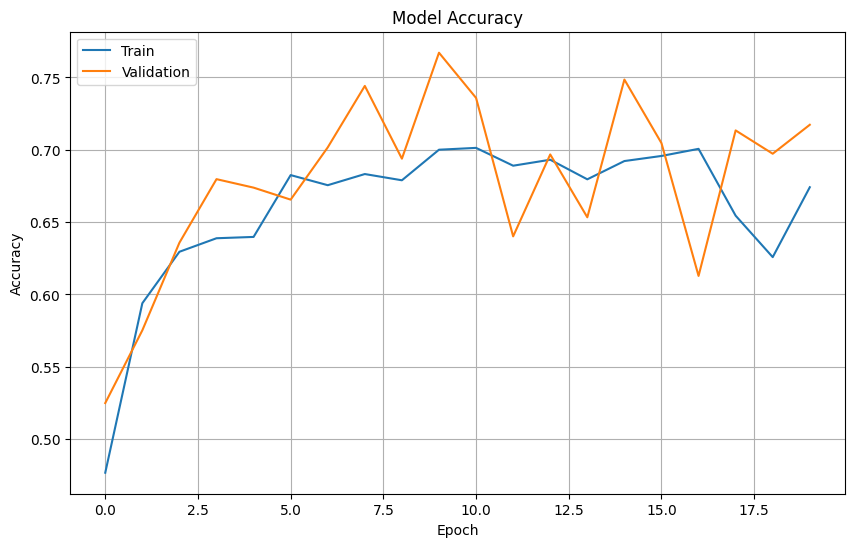

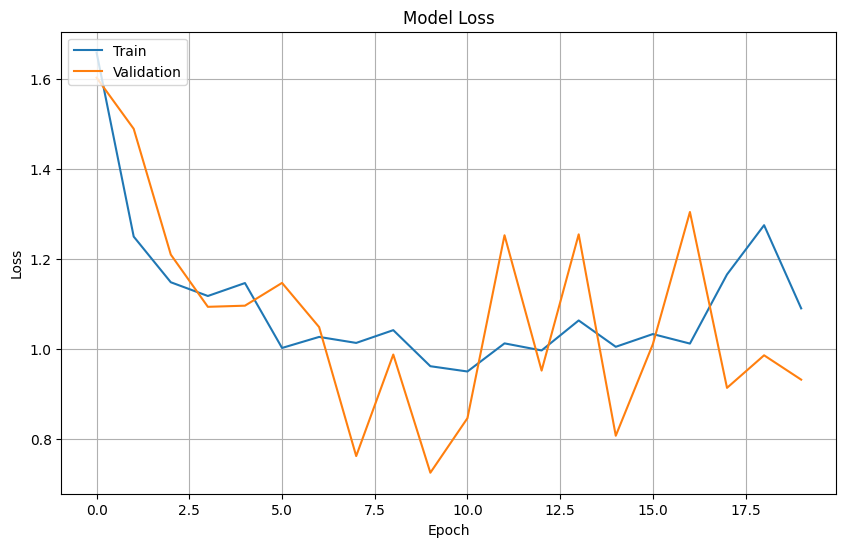

In [14]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.grid(True)
plt.show()

In [15]:
from skimage.transform import resize
from skimage.io import imread

def predict_new(imgpath, model):
    image = plt.imread(imgpath)
    plt.imshow(image)
    image_resized = resize(image, (256,256,3))
    image = image_resized.reshape(1,256,256,3)
    pred = model.predict(image)
    print(pred)
    x = np.argmax(pred)
    if x == 0:
        print("Pepper Bell Bacterial Spot")
    elif x == 1:
        print("Pepper Bell Healthy")
    elif x == 2:
        print("Potato Early Blight")
    elif x == 3:
        print("Poatato Healthy")
    elif x == 4:
        print("Potato Late Blight")
    elif x == 5:
        print("Tomato Bacterial Spot")
    elif x == 6:
        print("Tomato Early Blight")
    elif x == 7:
        print("Tomato Healthy")
    elif x == 8:
        print("Tomato Late Blight")
    elif x == 9:
        print("Tomato Leaf Mold")
    elif x == 10:
        print("Tomato Septoria Leaf Spot")
    elif x == 11:
        print("Tomato Spider Mites")
    elif x == 12:
        print("Tomato Target Spot")
    elif x == 13:
        print("Tomato Mosaic Virus")
    else:
        print("Tomato Yellow Leaf Curl Virus")
    

In [16]:
tomato_leaf_mold = '/kaggle/input/plantvillage/dataset/test/Tomato_Leaf_Mold/0160c3b5-d89e-40e5-a313-49ae1524040a___Crnl_L.Mold 6823.JPG'

1/1 [==============================] - 0s 171ms/step
[[1.77511480e-02 1.32810950e-01 4.38875119e-13 1.65115329e-04
  1.39411554e-07 8.42343070e-06 2.18673679e-03 1.01478407e-02
  7.61922896e-01 1.16244145e-02 3.52590233e-02 5.15644811e-03
  1.65575705e-02 6.40928233e-03 7.75612796e-10]]
Tomato Late Blight


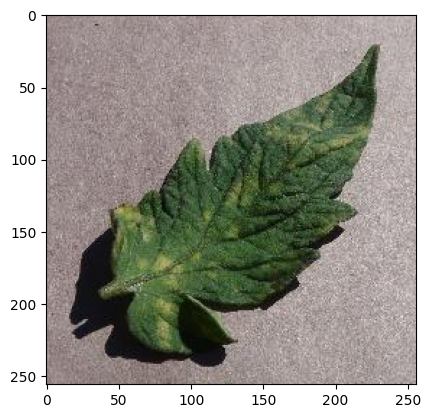

In [17]:
predict_new(tomato_leaf_mold, best_model)